# 地震のデータ分析
USGSの地震データを使って、地震の分布を地図上に可視化し、一日ごとの地震の数をグラフにしました。


In [1]:
#チャレンジ１
# 過去1ヶ月に報告された地震の総数
import requests; print(len(requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"]))

# 最大マグニチュードの地震とその発生場所と日にち
import requests, datetime; d=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"]; d=[x for x in d if x["properties"]["mag"] is not None]; m=max(d,key=lambda x:x["properties"]["mag"]); print(m["properties"]["mag"], m["properties"]["place"], datetime.datetime.utcfromtimestamp(m["properties"]["time"]/1000))

# 日本での地震の数
import requests; d=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"]; print(sum("Japan" in (q["properties"]["place"] or "") for q in d))


9724


C:\Users\masak\AppData\Local\Temp\ipykernel_21360\884304308.py:6: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  import requests, datetime; d=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"]; d=[x for x in d if x["properties"]["mag"] is not None]; m=max(d,key=lambda x:x["properties"]["mag"]); print(m["properties"]["mag"], m["properties"]["place"], datetime.datetime.utcfromtimestamp(m["properties"]["time"]/1000))


7.6 Drake Passage 2025-10-10 20:29:20.206000
114


In [2]:
#チャレンジ２
import requests,datetime;d=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"];b=[x for x in d if x["properties"]["mag"]and x["properties"]["mag"]>=6];[print(f'{x["properties"]["place"]}, M{x["properties"]["mag"]}, {datetime.datetime.utcfromtimestamp(x["properties"]["time"]/1000)}')for x in b];print("⚡M6.0以上:",len(b))


120 km E of Yamada, Japan, M6, 2025-11-10 07:23:18.202000
121 km E of Yamada, Japan, M6.4, 2025-11-09 08:54:36.991000
126 km E of Yamada, Japan, M6.8, 2025-11-09 08:03:37.808000
146 km SE of Petropavlovsk-Kamchatsky, Russia, M6, 2025-11-04 23:29:00.784000
146 km SE of Petropavlovsk-Kamchatsky, Russia, M6, 2025-11-04 03:45:12.324000
155 km SE of Petropavlovsk-Kamchatsky, Russia, M6.1, 2025-11-03 08:44:43.471000
22 km WSW of Khulm, Afghanistan, M6.3, 2025-11-02 20:29:02.028000
Banda Sea, M6.4, 2025-10-28 14:40:18.476000
4 km ESE of Sındırgı, Turkey, M6, 2025-10-27 19:48:28.858000
163 km E of Beauséjour, Guadeloupe, M6, 2025-10-27 12:54:59.494000
162 km E of Beauséjour, Guadeloupe, M6.5, 2025-10-27 12:38:40.311000
59 km NW of Pante Makasar, Timor Leste, M6.2, 2025-10-26 17:04:25.645000
197 km SSE of Lata, Solomon Islands, M6, 2025-10-25 23:28:04.780000
3 km N of Union, Philippines, M6, 2025-10-16 23:03:12.673000
194 km WNW of Abepura, Indonesia, M6.5, 2025-10-16 05:48:55.498000
Drake Pass

C:\Users\masak\AppData\Local\Temp\ipykernel_21360\3463393969.py:2: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  import requests,datetime;d=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"];b=[x for x in d if x["properties"]["mag"]and x["properties"]["mag"]>=6];[print(f'{x["properties"]["place"]}, M{x["properties"]["mag"]}, {datetime.datetime.utcfromtimestamp(x["properties"]["time"]/1000)}')for x in b];print("⚡M6.0以上:",len(b))


In [3]:
#チャレンジ3
import requests;n=[x["geometry"]["coordinates"][2] for x in requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"] if x["geometry"]["coordinates"][2] is not None];print(f'平均深度:{sum(n)/len(n):.1f}km 浅い:{sum(d<70 for d in n)} 中間:{sum(70<=d<=300 for d in n)} 深い:{sum(d>300 for d in n)}')


平均深度:21.8km 浅い:8980 中間:676 深い:81


In [4]:
#チャレンジ4
import requests,datetime;p=[x["properties"]["time"] for x in requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"] if x["properties"]["time"]];print("最古:",datetime.datetime.fromtimestamp(min(p)/1000,datetime.timezone(datetime.timedelta(hours=9))),"最新:",datetime.datetime.fromtimestamp(max(p)/1000,datetime.timezone(datetime.timedelta(hours=9))))

最古: 2025-10-05 09:08:29.920000+09:00 最新: 2025-11-11 20:46:29.330000+09:00


In [5]:
#チャレンジ5 ①
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


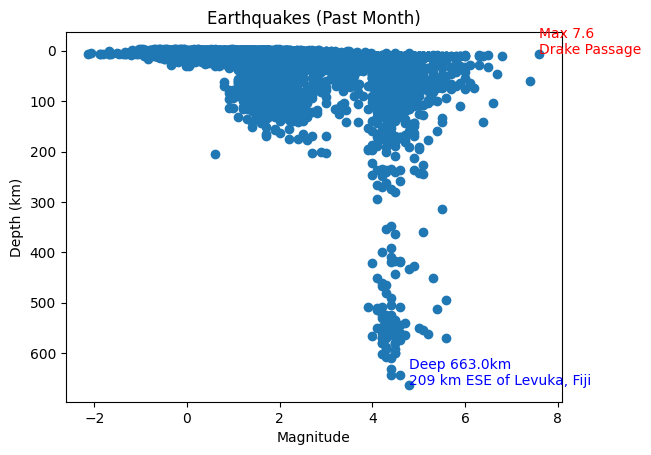

In [7]:
#チャレンジ5 ②
import requests,matplotlib.pyplot as plt;d=[x for x in requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05").json()["features"] if x["properties"]["mag"] and x["geometry"]["coordinates"][2] is not None];m=[x["properties"]["mag"] for x in d];z=[x["geometry"]["coordinates"][2] for x in d];p=[x["properties"]["place"] for x in d];a,b=m.index(max(m)),z.index(max(z));plt.scatter(m,z);plt.gca().invert_yaxis();plt.text(m[a],z[a],f'Max {m[a]:.1f}\n{p[a]}',color='r');plt.text(m[b],z[b],f'Deep {z[b]:.1f}km\n{p[b]}',color='b');plt.xlabel('Magnitude');plt.ylabel('Depth (km)');plt.title('Earthquakes (Past Month)');plt.show()

In [9]:
#チャレンジ6 ①
%pip install requests folium

^C
Note: you may need to restart the kernel to use updated packages.


In [10]:
#チャレンジ6 ②
import requests, folium
from datetime import datetime, timedelta, timezone

JST = timezone(timedelta(hours=9))
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-05"
data = [f for f in requests.get(url).json()["features"] if f["properties"]["mag"] and f["geometry"]]
m = folium.Map(location=[20, 140], zoom_start=2)

for f in data:
    mag = f["properties"]["mag"]
    lat, lon, depth = f["geometry"]["coordinates"][1], f["geometry"]["coordinates"][0], f["geometry"]["coordinates"][2]
    color = "green" if mag < 4 else "orange" if mag <= 6 else "red"
    time = datetime.utcfromtimestamp(f["properties"]["time"]/1000).replace(tzinfo=timezone.utc).astimezone(JST)
    tip = f"{f['properties']['place']}<br>M{mag} 深さ{depth}km<br>{time.strftime('%Y-%m-%d %H:%M:%S')}"
    folium.CircleMarker([lat, lon], radius=mag*2, color=color, fill=True, tooltip=tip).add_to(m)

m.save("earthquakes_map.html")
print("✅ 地図を保存しました → earthquakes_map.html をブラウザで開いてください")

C:\Users\masak\AppData\Local\Temp\ipykernel_21360\1551533824.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(f["properties"]["time"]/1000).replace(tzinfo=timezone.utc).astimezone(JST)


✅ 地図を保存しました → earthquakes_map.html をブラウザで開いてください


C:\Users\masak\AppData\Local\Temp\ipykernel_21360\1380329092.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(t).date() for t in times]  # 日付に変換


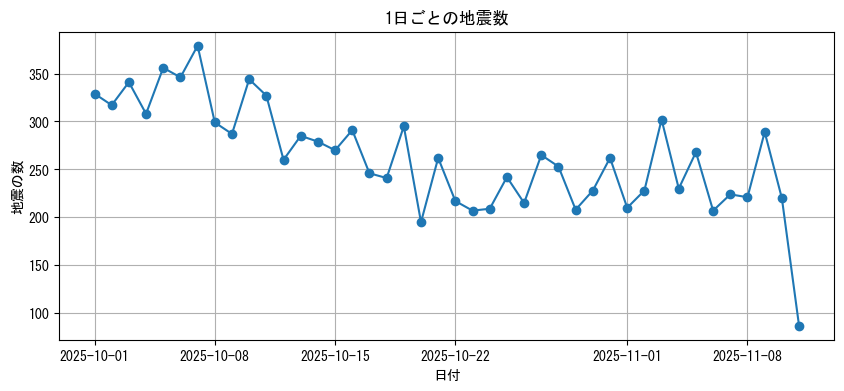

In [12]:
#1日ごとの地震数をグラフ

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 日本語フォント設定
plt.rcParams["font.family"] = "MS Gothic"

# USGSの地震データを取得（過去1か月分）
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-10-01"
data = requests.get(url).json()["features"]

# 各地震の発生時刻を取り出す
times = [f["properties"]["time"] / 1000 for f in data]  # ミリ秒を秒に変換
dates = [datetime.utcfromtimestamp(t).date() for t in times]  # 日付に変換

# pandasでデータフレームに変換
df = pd.DataFrame(dates, columns=["date"])

# 日ごとの地震数をカウント
daily_counts = df["date"].value_counts().sort_index()

# グラフを作成
plt.figure(figsize=(10,4))
plt.plot(daily_counts.index, daily_counts.values, marker="o")
plt.title("1日ごとの地震数")
plt.xlabel("日付")
plt.ylabel("地震の数")
plt.grid(True)
plt.show()
